In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# show the plot within the same page
%matplotlib inline 

In [6]:
df = pd.read_csv("data.csv")

In [7]:
df.head() #df.tail() to display the tail 5 records

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [8]:
df.groupby('deceptive').describe() #describe based on 'deceptive column'

hotel                     polarity                       source  \
          count unique     top freq    count unique       top freq  count   
deceptive                                                                   
deceptive   800     20  palmer   40      800      2  negative  400    800   
truthful    800     20  palmer   40      800      2  negative  400    800   

                                    text         \
          unique          top freq count unique   
deceptive                                         
deceptive      1        MTurk  800   800    800   
truthful       2  TripAdvisor  400   800    796   

                                                                   
                                                         top freq  
deceptive                                                          
deceptive  I recently stayed at the Sofitel Hotel (Chicag...    1  
truthful   Very disappointed in our stay in Chicago Monoc...    2

In [9]:
df.groupby('polarity').describe()

deceptive                       hotel                     source  \
             count unique       top freq count unique     top freq  count   
polarity                                                                    
negative       800      2  truthful  400   800     20  palmer   40    800   
positive       800      2  truthful  400   800     20  palmer   40    800   

                             text         \
         unique    top freq count unique   
polarity                                   
negative      2  MTurk  400   800    796   
positive      2  MTurk  400   800    800   

                                                                  
                                                        top freq  
polarity                                                          
negative  Very disappointed in our stay in Chicago Monoc...    2  
positive  My husband and I stayed at the Hyatt Regency w...    1

In [10]:
df.groupby('source').describe()

deceptive                        hotel                        \
                count unique        top freq count unique       top freq   
source                                                                     
MTurk             800      1  deceptive  800   800     20    palmer   40   
TripAdvisor       400      1   truthful  400   400     20  fairmont   20   
Web               400      1   truthful  400   400     20  fairmont   20   

            polarity                        text         \
               count unique       top freq count unique   
source                                                    
MTurk            800      2  negative  400   800    800   
TripAdvisor      400      1  positive  400   400    400   
Web              400      1  negative  400   400    396   

                                                                     
                                                           top freq  
source                                                               
MTurk        I recently stayed at the Sofitel Hotel (Chicag...    1  
TripAdvisor  This was a great place to be! Great views of r...    1  
Web          Very disappointed in our stay in Chicago Monoc...    2

In [11]:
df.source.value_counts()

MTurk          800
TripAdvisor    400
Web            400
Name: source, dtype: int64

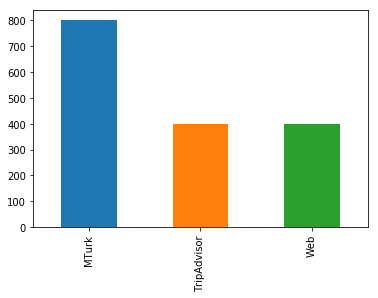

In [12]:
df.source.value_counts().plot.bar()

In [13]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
stop_words = open('stopwords.txt', 'r').read()
reviews = df.text.values
print(reviews)

['We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n'
 'Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n'
 "This comes a little late as I'm finally catching up on my reviews from the past several months:) A dear friend and I stayed at the

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
df = pd.read_csv('data.csv')

In [16]:
count_vectorizer = CountVectorizer(stop_words='english')
tokens = count_vectorizer.fit_transform(df.text.tolist())

In [17]:
word_count = pd.DataFrame(tokens.A, columns=count_vectorizer.get_feature_names())
word_count.head()

,00,000,00a,00am,00pm,03,04,05,06,07,...,yum,yummo,yummy,yunan,yup,zagat,zest,zipped,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
word_count.to_csv('word_count.csv', index=False)
bag_of_words = count_vectorizer.transform(reviews).sum(axis=0)

In [19]:
bag_of_words.max(axis=1)

matrix([[3337]], dtype=int64)

In [20]:
df.groupby('hotel').describe()

deceptive                        polarity                   \
                     count unique        top freq    count unique       top   
hotel                                                                         
affinia                 80      2  deceptive   40       80      2  negative   
allegro                 80      2  deceptive   40       80      2  negative   
amalfi                  80      2  deceptive   40       80      2  negative   
ambassador              80      2  deceptive   40       80      2  negative   
conrad                  80      2  deceptive   40       80      2  negative   
fairmont                80      2  deceptive   40       80      2  negative   
hardrock                80      2  deceptive   40       80      2  negative   
hilton                  80      2  deceptive   40       80      2  negative   
homewood                80      2  deceptive   40       80      2  negative   
hyatt                   80      2  deceptive   40       80      2  negative   
intercontinental        80      2  deceptive   40       80      2  negative   
james                   80      2  deceptive   40       80      2  negative   
knickerbocker           80      2  deceptive   40       80      2  negative   
monaco                  80      2  deceptive   40       80      2  negative   
omni                    80      2  deceptive   40       80      2  negative   
palmer                  80      2  deceptive   40       80      2  negative   
sheraton                80      2  deceptive   40       80      2  negative   
sofitel                 80      2  deceptive   40       80      2  negative   
swissotel               80      2  deceptive   40       80      2  negative   
talbott                 80      2  deceptive   40       80      2  negative   

                      source                     text         \
                 freq  count unique    top freq count unique   
hotel                                                          
affinia            40     80      3  MTurk   40    80     79   
allegro            40     80      3  MTurk   40    80     80   
amalfi             40     80      3  MTurk   40    80     80   
ambassador         40     80      3  MTurk   40    80     80   
conrad             40     80      3  MTurk   40    80     80   
fairmont           40     80      3  MTurk   40    80     80   
hardrock           40     80      3  MTurk   40    80     80   
hilton             40     80      3  MTurk   40    80     80   
homewood           40     80      3  MTurk   40    80     80   
hyatt              40     80      3  MTurk   40    80     80   
intercontinental   40     80      3  MTurk   40    80     80   
james              40     80      3  MTurk   40    80     80   
knickerbocker      40     80      3  MTurk   40    80     80   
monaco             40     80      3  MTurk   40    80     79   
omni               40     80      3  MTurk   40    80     78   
palmer             40     80      3  MTurk   40    80     80   
sheraton           40     80      3  MTurk   40    80     80   
sofitel            40     80      3  MTurk   40    80     80   
swissotel          40     80      3  MTurk   40    80     80   
talbott            40     80      3  MTurk   40    80     80   

                                                                          
                                                                top freq  
hotel                                                                     
affinia           I'd been searching for a cool, non-chain hotel...    2  
allegro           My wife and I stayed here for a weekend and we...    1  
amalfi            I recently stayed at this hotel not to long ag...    1  
ambassador        My husband and I recently spent 3 nights at th...    1  
conrad            We stayed here for a weekend trip to Chicago a...    1  
fairmont          If you want a 5-star hotel with 1-star service...    1  
hardrock          This is a tough one to review... 

In [21]:
df.hotel.value_counts()

affinia             80
talbott             80
james               80
palmer              80
fairmont            80
hilton              80
sheraton            80
monaco              80
swissotel           80
sofitel             80
hyatt               80
homewood            80
ambassador          80
conrad              80
allegro             80
amalfi              80
knickerbocker       80
hardrock            80
intercontinental    80
omni                80
Name: hotel, dtype: int64

In [22]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams

review_list = df['text'].tolist()
page_text = review_list[0].lower()
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(page_text)
filtered_words = [w for w in tokens if not w in stopwords.words('english')]
# word count using unigram
bgs = ngrams(filtered_words, 1)
fdist = nltk.FreqDist(bgs)
print("\nWords and their frequencies after removing stop words, hyphens, punctuation:")
for k, v in fdist.items():
    print(k[0] + ":" + str(v), end=" ")
# fdist.plot()


Words and their frequencies after removing stop words, hyphens, punctuation:
stayed:1 one:1 night:1 getaway:1 family:1 thursday:1 triple:1 aaa:1 rate:1 173:1 steal:1 7th:1 floor:1 room:1 complete:1 44in:1 plasma:1 tv:1 bose:1 stereo:1 voss:1 evian:1 water:1 gorgeous:1 bathroom:1 tub:1 fine:1 us:1 concierge:1 helpful:1 cannot:1 beat:1 location:1 flaw:1 breakfast:1 pricey:1 service:1 slow:1 2hours:1 four:2 kids:1 adults:1 friday:1 morning:1 even:1 though:1 two:1 tables:1 restaurant:1 food:1 good:1 worth:1 wait:1 would:1 return:1 heartbeat:1 gem:1 chicago:1 

Bag of words implementation in full

In [23]:
import nltk, re, numpy, sys
from nltk.corpus import stopwords

def word_extraction(sentence):
    set(stopwords.words('english'))
    ignore = stopwords
    words = re.sub("[^\w]", " ",  sentence).split()
    cleaned_text = [w.lower() for w in words if w not in stopwords.words('english')]
    return cleaned_text

def tokenize(review_list):
    words = []
    for sentence in review_list:
        w = word_extraction(sentence)
        words.extend(w)

    words = sorted(list(set(words)))
    return words


def generate_bow(review_list):
    header_file = open("header_phase1.txt", "a+")
    vocab = tokenize(review_list)
    #print("Word List for Document with total of", len(vocab), "words\n{0} \n".format(vocab));
    print("Vocabulary with total of", len(vocab), "unique words\n" + ' '.join(str(x) for x in vocab) + "\n");
    header_file.write(' '.join(str(x) for x in vocab) + "\n")
    return vocab

review_list = df['text'].tolist()
vocab = generate_bow(review_list)
data_file = open("data_phase1.txt", "a+")

for sentence in review_list:
    words = word_extraction(sentence)
    bag_vector = numpy.zeros(len(vocab))
    for w in words:
        for i, word in enumerate(vocab):
            if word == w:
                bag_vector[i] += 1

    #print("{0}\n{1}\n".format(sentence, numpy.array(bag_vector)))
    #print(numpy.savetxt(sys.stdout, numpy.array(bag_vector), newline=' ', fmt='%i', delimiter=''))
    templist = bag_vector.tolist()
    newlist = [round(x) for x in templist]
    # print(sentence)
    # print(' '.join(str(x) for x in newlist) + "\n")
    data_file.write(' '.join(str(x) for x in newlist) + "\n")
print("Header file and data file written...")

Vocabulary with total of 9578 unique words
0 00 000 00a 00am 00pm 03 04 05 06 07 08 0800 09 1 10 100 103 104 105 105mph 107 10am 10pm 10th 10x 10yo 11 110 1112 116 11am 11th 12 120 122 1230am 125 127 129 12am 12pm 12th 13 130 130lb 1334 135 139 13th 14 140 1400 149 14th 15 150 1500 1508 1519 1546 155 159 15mins 15th 16 160 1605 160th 1618 165 16th 16thz 17 170 173 175 1760 179 17th 18 180 1802 18th 19 1900 1901 191 1920s 1923 1927 1960 1968 1970s 1992 19th 1am 1or 1pm 1st 2 20 200 2000 2004 2005 2006 2007 2008 2009 200ish 2010 2011 2012 203 20th 20x 21 212 214 215 217 219 21st 22 220 22nd 23 23242 23rd 24 240 245 249 24hrs 24th 25 250 259 25th 26 260 26th 27 2703 279 27th 28 289 28th 29 299 29th 2am 2day 2hours 2nd 2pm 2s 2sure 2x 3 30 300 3000 30a 30am 30pm 30th 31 3114 3115 312 313 316 32 325 32in 32nd 33 330 33rd 34 3405 349 34th 35 350 35c 35th 36 37 3711 372 38 3pm 3rd 3rds 3the 3x 3x4 4 40 400 40degrees 40th 41 41st 42 425 42in 42nd 43 431 44 44in 45 450 45pm 46 47 48 480 49 49er

Header file and data file written...


In [24]:
import nltk, re, numpy, sys
from nltk.corpus import stopwords

def word_extraction(sentence):
    set(stopwords.words('english'))
    ignore = stopwords
    words = re.sub("[^\w]", " ",  sentence).split()
    cleaned_text = [w.lower() for w in words if w not in stopwords.words('english')]
    porter = PorterStemmer()
    stemmed = [porter.stem(token) for token in cleaned_text]
    return stemmed

def tokenize(review_list):
    words = []
    for sentence in review_list:
        w = word_extraction(sentence)
        words.extend(w)

    words = sorted(list(set(words)))
    return words


def generate_bow(review_list):
    header_file = open("header_phase2.txt", "a+")
    vocab = tokenize(review_list)
    #print("Word List for Document with total of", len(vocab), "words\n{0} \n".format(vocab));
    print("Vocabulary with total of", len(vocab), "unique words\n" + ' '.join(str(x) for x in vocab) + "\n");
    header_file.write(' '.join(str(x) for x in vocab) + "\n")
    return vocab

review_list = df['text'].tolist()
vocab = generate_bow(review_list)
data_file = open("data_phase2.txt", "a+")

for sentence in review_list:
    words = word_extraction(sentence)
    bag_vector = numpy.zeros(len(vocab))
    for w in words:
        for i, word in enumerate(vocab):
            if word == w:
                bag_vector[i] += 1

    templist = bag_vector.tolist()
    newlist = [round(x) for x in templist]
    # print(sentence)
    # print(' '.join(str(x) for x in newlist) + "\n")
    data_file.write(' '.join(str(x) for x in newlist) + "\n")
print("Header file and data file written...")

Vocabulary with total of 6791 unique words
0 00 000 00a 00am 00pm 03 04 05 06 07 08 0800 09 1 10 100 103 104 105 105mph 107 10am 10pm 10th 10x 10yo 11 110 1112 116 11am 11th 12 120 122 1230am 125 127 129 12am 12pm 12th 13 130 130lb 1334 135 139 13th 14 140 1400 149 14th 15 150 1500 1508 1519 1546 155 159 15min 15th 16 160 1605 160th 1618 165 16th 16thz 17 170 173 175 1760 179 17th 18 180 1802 18th 19 1900 1901 191 1920 1923 1927 1960 1968 1970 1992 19th 1am 1or 1pm 1st 2 20 200 2000 2004 2005 2006 2007 2008 2009 200ish 2010 2011 2012 203 20th 20x 21 212 214 215 217 219 21st 22 220 22nd 23 23242 23rd 24 240 245 249 24hr 24th 25 250 259 25th 26 260 26th 27 2703 279 27th 28 289 28th 29 299 29th 2am 2day 2hour 2nd 2pm 2s 2sure 2x 3 30 300 3000 30a 30am 30pm 30th 31 3114 3115 312 313 316 32 325 32in 32nd 33 330 33rd 34 3405 349 34th 35 350 35c 35th 36 37 3711 372 38 3pm 3rd 3the 3x 3x4 4 40 400 40degre 40th 41 41st 42 425 42in 42nd 43 431 44 44in 45 450 45pm 46 47 48 480 49 49er 4pm 4th 5 5

KeyboardInterrupt: 

By applying stemming, the unique word count has reduced from 9578 to 6791 introducing 2787 words reduction 
and the data file from 29.2MB to 20.7MB introducing 8.5MB file size reduction

At this point, we will try to apply logistic regression.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
data = pd.read_csv("data.csv", header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

In [118]:
data.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [ ]:
data['deceptive'].unique()

In [ ]:
data['hotel'].unique()

In [ ]:
data['source'].unique()

{'quite': 279, 'simply': 308, 'the': 339, 'hyatt': 184, 'regency': 287, 'chicago': 73, 'is': 192, 'business': 56, 'traveler': 358, 'best': 49, 'friend': 145, 'recently': 284, 'had': 166, 'to': 352, 'attend': 33, 'seminar': 302, 'in': 188, 'and': 19, 'stayed': 321, 'at': 31, 'say': 297, 'was': 379, 'impressed': 187, 'would': 408, 'be': 40, 'an': 18, 'understatement': 363, 'centrally': 68, 'located': 207, 'heart': 170, 'of': 239, 'downtown': 109, 'my': 226, 'girlfriends': 156, 'during': 111, 'shopping': 306, 'trip': 360, 'city': 75, 'june': 194, '2010': 0, 'we': 381, 'found': 142, 'great': 163, 'deal': 94, 'on': 243, 'orbitz': 250, 'com': 81, 'decided': 95, 'give': 157, 'it': 193, 'try': 361, 'location': 208, 'perfect': 261, 'husband': 183, 'while': 395, 'attending': 34, 'family': 129, 'wedding': 384, 'from': 148, 'moment': 219, 'entered': 119, 'beautiful': 41, 'lobby': 204, 'were': 389, 'treated': 359, 'as': 30, 'if': 186, 'returning': 291, 'friends': 147, 'our': 252, 'rooms': 294, 'rea

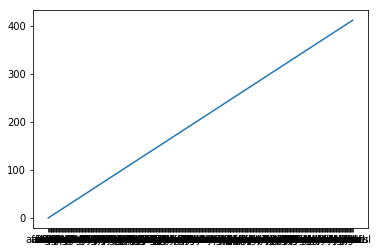

In [25]:
fileconnection=open("data.csv", 'r')
lines=fileconnection.readlines()

header = lines[0]
fieldnames=header.strip().split(',')
# print(fieldnames)

my_list=[]
for row in lines[1:]:
    vals=row.strip().split(',')
    if vals[0] == "deceptive" and vals[1]=="hyatt":
        c="{}".format(vals[4])
        # print(c[1:])
        my_list.append(c[1:].strip())
# print(my_list)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(my_list).todense()
print(vectorizer.vocabulary_)

data = sorted(vectorizer.vocabulary_.items()) # sorted by key, return a list of tuples

import matplotlib.pylab as plt
%matplotlib inline
lists = sorted(vectorizer.vocabulary_.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

{'the': 305, 'affinia': 9, 'hotel': 149, 'in': 156, 'chicago': 62, 'was': 344, 'superb': 297, 'room': 263, 'service': 267, 'exemplary': 104, 'and': 20, 'food': 119, 'manhattan': 186, 'is': 161, 'fantastic': 113, 'my': 196, 'husband': 151, 'stayed': 286, 'there': 308, 'when': 355, 'we': 347, 'went': 352, 'to': 317, 'visit': 339, 'sister': 273, 'loved': 180, 'it': 162, 'one': 218, 'of': 214, 'best': 48, 'beds': 44, 'have': 139, 'ever': 99, 'slept': 275, 'view': 338, 'incredible': 157, 'most': 193, 'beautiful': 41, 'places': 238, 'been': 45, 'staff': 284, 'very': 337, 'helpful': 142, 'as': 27, 'well': 351, 'they': 310, 'had': 136, 'no': 207, 'problem': 246, 'going': 127, 'out': 223, 'their': 306, 'way': 346, 'be': 40, 'would': 361, 'suggest': 294, 'this': 313, 'anybody': 22, 'great': 131, 'location': 175, 'town': 323, 'cousin': 77, 'an': 19, 'for': 120, 'three': 314, 'nights': 206, 'at': 29, 'wonderful': 359, 'its': 163, 'so': 278, 'close': 66, 'shopping': 269, 'wanted': 343, 'do': 89, 'w

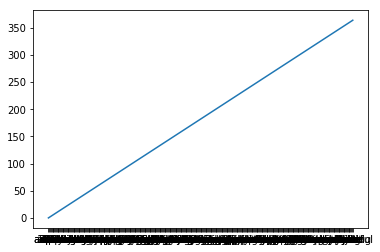

In [26]:
fileconnection=open("data.csv", 'r')
lines=fileconnection.readlines()

header = lines[0]
fieldnames=header.strip().split(',')
# print(fieldnames)

my_list=[]
for row in lines[1:]:
    vals=row.strip().split(',')
    if vals[0] == "deceptive" and vals[1]=="affinia":
        c="{}".format(vals[4])
        # print(c[1:])
        my_list.append(c[1:].strip())
# print(my_list)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(my_list).todense()
print(vectorizer.vocabulary_)

import matplotlib.pylab as plt
%matplotlib inline
lists = sorted(vectorizer.vocabulary_.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

{'my': 1576, 'husband': 1228, 'and': 147, 'visited': 2558, 'the': 2376, 'fairmont': 920, 'chicago': 457, 'millennium': 1522, 'park': 1718, 'for': 999, 'our': 1682, 'honeymoon': 1199, 'customer': 625, 'service': 2085, 'was': 2582, 'amazing': 135, 'from': 1030, 'time': 2408, 'we': 2592, 'booked': 337, 'packege': 1703, 'to': 2414, 'checked': 447, 'in': 1263, 'everything': 864, 'absolutely': 42, 'these': 2384, 'people': 1743, 'were': 2611, 'proficient': 1849, 'wife': 2633, 'deluxe': 673, 'accessible': 49, 'room': 2013, 'at': 220, 'this': 2392, 'beautiful': 279, 'hotel': 1214, 'three': 2398, 'nights': 1615, 'wonderful': 2656, 'photos': 1764, 'don': 745, 'do': 737, 'justice': 1334, 'it': 1318, 'couldn': 596, 'have': 1140, 'been': 292, 'more': 1553, 'ideal': 1237, 'stay': 2244, 'spacious': 2210, 'clean': 478, 'quite': 1884, 'simply': 2128, 'hyatt': 1231, 'regency': 1938, 'is': 1314, 'business': 372, 'traveler': 2449, 'best': 310, 'friend': 1025, 'recently': 1917, 'had': 1117, 'attend': 226, '

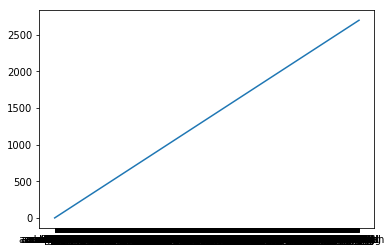

In [27]:
fileconnection=open("data.csv", 'r')
lines=fileconnection.readlines()

header = lines[0]
fieldnames=header.strip().split(',')
# print(fieldnames)

my_list=[]
for row in lines[1:]:
    vals=row.strip().split(',')
    if vals[0] == "deceptive" and vals[3]=="MTurk":
        c="{}".format(vals[4])
        # print(c[1:])
        my_list.append(c[1:].strip())
# print(my_list)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(my_list).todense()
print(vectorizer.vocabulary_)

import matplotlib.pylab as plt
%matplotlib inline
lists = sorted(vectorizer.vocabulary_.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

{'we': 1779, 'stayed': 1526, 'for': 667, 'one': 1122, 'night': 1076, 'getaway': 701, 'with': 1819, 'family': 616, 'on': 1120, 'thursday': 1633, 'triple': 1687, 'aaa': 76, 'rate': 1289, 'of': 1108, '173': 21, 'was': 1772, 'steal': 1530, '7th': 70, 'floor': 661, 'room': 1374, 'complete': 387, '44in': 57, 'plasma': 1212, 'tv': 1700, 'bose': 260, 'stereo': 1536, 'upgrade': 1724, 'to': 1643, 'view': 1747, 'less': 916, 'than': 1602, '200': 25, 'which': 1803, 'also': 117, 'included': 833, 'breakfast': 271, 'vouchers': 1755, 'had': 750, 'great': 733, 'river': 1366, 'this': 1623, 'comes': 377, 'little': 933, 'late': 909, 'as': 162, 'finally': 642, 'catching': 311, 'up': 1721, 'my': 1051, 'reviews': 1359, 'from': 684, 'the': 1606, 'past': 1180, 'several': 1421, 'months': 1035, 'dear': 450, 'friend': 680, 'and': 132, 'at': 168, 'hyatt': 814, 'regency': 1322, 'in': 831, 'october': 1104, '2007': 29, 'while': 1804, 'visiting': 1754, 'her': 781, 'husband': 813, 'out': 1142, 'town': 1664, 'hotel': 803

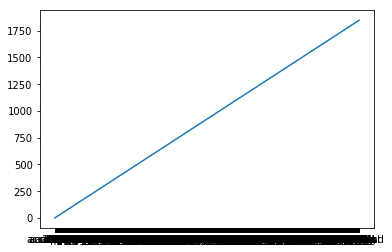

In [28]:
fileconnection=open("data.csv", 'r')
lines=fileconnection.readlines()

header = lines[0]
fieldnames=header.strip().split(',')
# print(fieldnames)

my_list=[]
for row in lines[1:]:
    vals=row.strip().split(',')
    if vals[0] == "truthful" and vals[3]=="TripAdvisor":
        c="{}".format(vals[4])
        # print(c[1:])
        my_list.append(c[1:].strip())
# print(my_list)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(my_list).todense()
print(vectorizer.vocabulary_)

import matplotlib.pylab as plt
%matplotlib inline
lists = sorted(vectorizer.vocabulary_.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

{'booked': 297, 'room': 1687, 'queen': 1576, 'bed': 252, 'for': 827, 'nights': 1353, 'wonderful': 2198, 'nye': 1381, 'arrived': 184, 'and': 144, 'my': 1325, 'friends': 848, 'were': 2166, 'already': 129, 'there': 1967, 'visiting': 2126, 'nearby': 1333, 'art': 186, 'gallery': 866, 'they': 1970, 'put': 1574, 'name': 1327, 'on': 1406, 'the': 1962, 'reservation': 1654, 'told': 2002, 'me': 1257, 'to': 1998, 'get': 875, 'key': 1113, 'from': 849, 'front': 850, 'desk': 584, 'when': 2169, 'staff': 1863, 'gave': 869, 'stuff': 1904, 'away': 218, 'went': 2165, 'meet': 1262, 'group': 922, 'we': 2154, 'returned': 1669, 'late': 1139, 'that': 1961, 'night': 1351, 'soon': 1837, 'realized': 1601, 'in': 1041, 'was': 2146, 'not': 1366, 'placed': 1507, 'afternoon': 107, 'speak': 1848, 'with': 2192, 'met': 1271, 'can': 347, 'do': 625, 'anything': 158, 'about': 68, 'right': 1677, 'now': 1376, 'due': 660, 'hour': 1006, 'will': 2181, 'disrupt': 618, 'guest': 928, 'staying': 1883, 'you': 2225, 'say': 1708, 'left

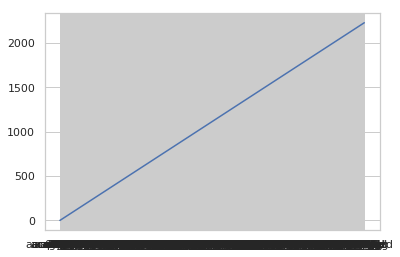

In [188]:
fileconnection=open("data.csv", 'r')
lines=fileconnection.readlines()

header = lines[0]
fieldnames=header.strip().split(',')
# print(fieldnames)

my_list=[]
for row in lines[1:]:
    vals=row.strip().split(',')
    if vals[0] == "truthful" and vals[3]=="Web":
        c="{}".format(vals[4])
        # print(c[1:])
        my_list.append(c[1:].strip())
# print(my_list)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(my_list).todense()
print(vectorizer.vocabulary_)

import matplotlib.pylab as plt
%matplotlib inline
lists = sorted(vectorizer.vocabulary_.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

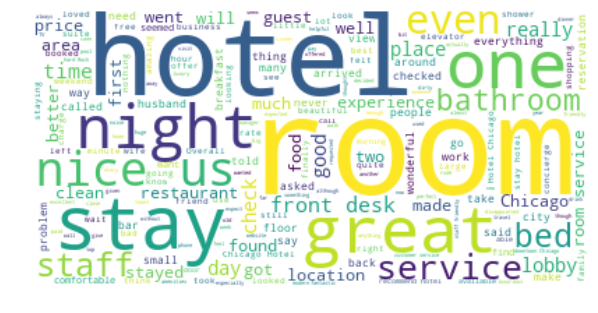

In [29]:
# conda install -c conda-forge wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df = pd.read_csv("data.csv")
text = ' '.join(df.text.values)

# Create and generate a word cloud image:
# wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Top 10 words in deceptive reviews
# corpus = df[df.deceptive == 'deceptive'].text
corpus = df[df.deceptive == 'deceptive'].text
vec = CountVectorizer(stop_words='english').fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10] # Top 10 words

[('hotel', 1840),
 ('room', 1408),
 ('chicago', 1040),
 ('stay', 703),
 ('service', 430),
 ('staff', 398),
 ('rooms', 347),
 ('like', 329),
 ('stayed', 316),
 ('great', 316)]

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df = pd.read_csv("data-new.csv")

In [32]:
df.dropna(inplace=True)

In [33]:
df.head()

,deceptive,hotel,polarity,source,text,new
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,"night, thursday, friday morning"
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,"the past several months, late October 2007, ni..."
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,3 minutes
5,truthful,omni,positive,TripAdvisor,I stayed at the Omni for one night following a...,"night, night, the day, more than about 30 seconds"
6,truthful,conrad,positive,TripAdvisor,We stayed in the Conrad for 4 nights just befo...,"nights, Thanksgiving"


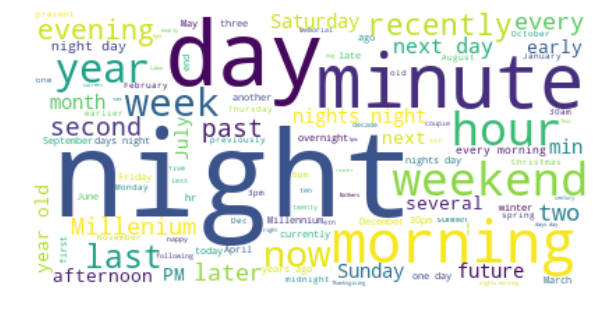

In [34]:
text = ','.join(df[df.deceptive=='truthful']['new'].values)

# Create and generate a word cloud image:
# wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(background_color="white").generate(text)
# where do I change for this one truthful to deceptive or otherway?

# Display the generated image:
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

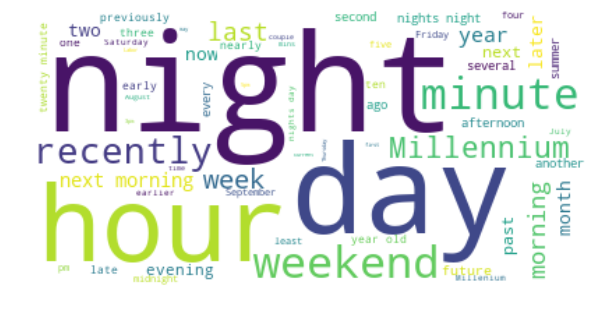

In [35]:
text = ','.join(df[df.deceptive=='deceptive']['new'].values)

# Create and generate a word cloud image:
# wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(background_color="white").generate(text)


# Display the generated image:
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df[df.polarity == 'negative'].new
vec = CountVectorizer(stop_words='english').fit(corpus)
bag_of_words = vec.transform(corpus)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:10] # Top 10 words

[('night', 352),
 ('day', 195),
 ('minutes', 166),
 ('morning', 122),
 ('hour', 103),
 ('weekend', 99),
 ('nights', 83),
 ('recently', 80),
 ('hours', 78),
 ('days', 77)]